#**dupla:** Kaio Brasil e Valdimiro Alves

# Estudo numérico do Modelo SIR(x) com comportamento humano


Ao longo de toda a história da humanidade, doenças infecciosas proporcionam episódios pandêmicos devastadores para a sociedade. Obviamente, estes episódios introduzem grandes sobrecargas
de morbidade e mortalidade na raça humana e com isso alterando o comportamento humano frente
a estas pandemias. Pois, no meio de uma pandemia notamos grupos de pessoas que tem o padrão de
serem mais cuidadosas e outra menos cuidadosas. Dentro deste contexto de mudança de comportamento humano frente a pandemia, iremos discutir numericamente um modelo SIR(Suscetíveis,
Infectados e Recuperados) com um programa de vacinação onde por meio da teoria dos jogos
evolucionários a dinâmica da imitação é acoplada para simular o comportamento humano onde
denotaremos esse novo modelo por SIR(x).
Dado que a doença se torna endêmica se nada for feito, é razoável desenvolver um programa
de vacinação. Suponha que uma fração x dos recém-nascidos sejam vacinados contra a doença e
que a vacinação seja totalmente eficaz. Assim, uma fração x de recém-nascidos entra na categoria
recuperada e uma fração 1 − x entra na categoria suscetível. Os pais que optam por não vacinar
seu recém-nascido têm uma recompensa negativa porque seu filho pode contrair a doença. Essa
recompensa é proporcional ao número de contagiosos na população. Portanto, é −mI onde m é
uma constante positiva. Por outro lado, os pais que optam por vacinar seu recém-nascido têm um
retorno negativo devido à possibilidade de efeitos colaterais da vacina. Este pagamento é −k, onde
k é uma constante positiva. Portanto, a recompensa de vacinar subtraída da recompensa de não
vacinar é igual a −k + mI. Para vacinas em uso, k é muito menor do que m. Assim, quando I não
é muito baixo (I > k
m ), a vacinação tem um retorno maior, mas quando I é muito baixo (I < k
m ),
como será se o programa de vacinação já estiver em vigor há muito tempo, não vacinar tem uma
recompensa maior. Supondo a dinâmica de imitação, temos x˙ = ρx(1 − x)(−k + mI) com ρ uma
constante positiva. Quando a vacinação dá um retorno maior; x aumenta; quando a vacinação dá
um retorno menor; x diminui.

- \(S\) = µ(1 − x) − βSI − µS

- \(I\) = βSI − γI − µI

- \(R\) = γI − µR + µx

- \(x\) = ρx(1 − x)(−k + mI).

Para realizar a análise numérica do modelo, usamos uma discretização padrão em diferenças
finitas nas equações.Os parâmetros usados foram β = 0.6, γ = 1/6, µ = 0.1, ρ = 5.1, k = 3/10 e
m = 3. Com passo no tempo dt = 0.1 e tempo terminal T = 10.
O projeto tem como base [https://proceedings.sbmac.org.br/sbmac/article/view/3975/4025].
No entanto,os gráficos e parametros não foram plotados da mesma forma visto que os gráficos são confusos para entendimento do leitor. Assim, foi somente feito o grafico em 2D das quatro curvas.


100


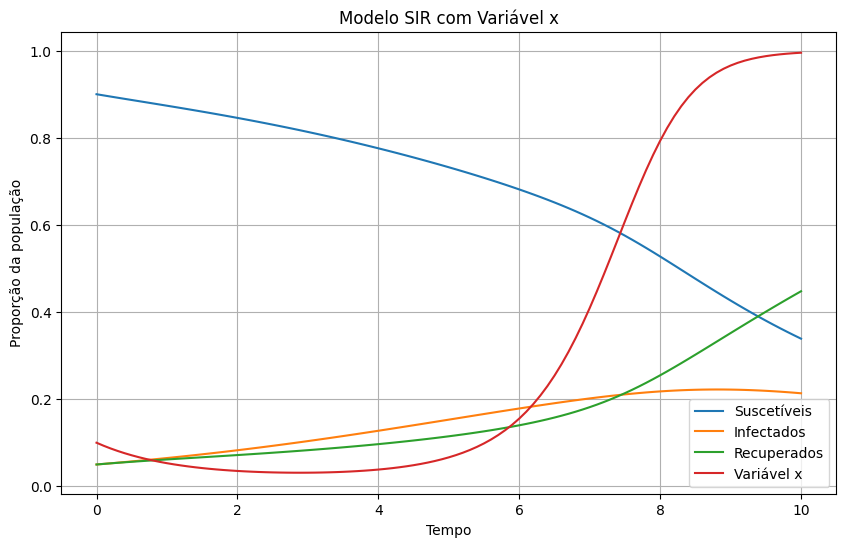

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


def solve_sir_model(mu, beta, gamma, rho, k, m, S0, I0, R0, x0, T, dt):
    num_steps = int(T / dt)
    S = np.zeros(num_steps + 1)
    I = np.zeros(num_steps + 1)
    R = np.zeros(num_steps + 1)
    x = np.zeros(num_steps + 1)
    print(num_steps)

    S[0], I[0], R[0], x[0] = S0, I0, R0, x0

    for i in range(num_steps):
        S_dot = mu * (1 - x[i]) - beta * S[i] * I[i] - mu * S[i]
        I_dot = beta * S[i] * I[i] - gamma * I[i] - mu * I[i]
        R_dot = gamma * I[i] - mu * R[i] + mu * x[i]
        x_dot = rho * x[i] * (1 - x[i]) * (-k + m * I[i])

        S[i + 1] = S[i] + S_dot *dt
        I[i + 1] = I[i] + I_dot *dt
        R[i + 1] = R[i] + R_dot *dt
        x[i + 1] = x[i] + x_dot *dt


    return S, I, R, x

# Parâmetros do modelo
beta = 0.6
gamma = 0.17
mu = 0.1
rho = 5.1
k = 0.3
m = 3

# Condições iniciais
S0 = 0.900
I0 = 0.050
R0 = 0.050
x0 = 0.100

# Tempo total e passo de tempo
T = 10
dt = 0.1

# Chama a função para resolver o modelo SIR
S, I, R, x = solve_sir_model(mu, beta, gamma, rho, k, m, S0, I0, R0, x0, T, dt)


# Os arrays S, I, R e x agora contêm as soluções discretizadas do modelo SIR com a variável adicional x.
# Tempo
t = np.linspace(0, T, int(T/dt) + 1)

# Plote os resultados
plt.figure(figsize=(10, 6))
plt.plot(t, S, label='Suscetíveis')
plt.plot(t, I, label='Infectados')
plt.plot(t, R, label='Recuperados')
plt.plot(t, x, label='Variável x')
plt.xlabel('Tempo')
plt.ylabel('Proporção da população')
plt.title('Modelo SIR com Variável x')
plt.legend()
plt.grid(True)
plt.show()

# Analise do gráfico

O gráfico leva em consideração frações da população que são expostas a infecção.
A variavel x cresce de forma veloz porque o modelo considera x como a população que foi vacinada e com a vacina sendo totalment e eficaz.
Assim, a variavel x cresce de forma muito mais rapida em relação o crescimento dos recuperados.
